# 시계열 표본 만들기

`sm.tsa.ArmaProcess(ar, ma)`: ARMA 모델

# 1. q차 MA 모형
## - ACF로 다른 GLRPM와 구분 가능
### $$Y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$$

MA(1)

In [1]:
import statsmodels.api as sm
%matplotlib inline

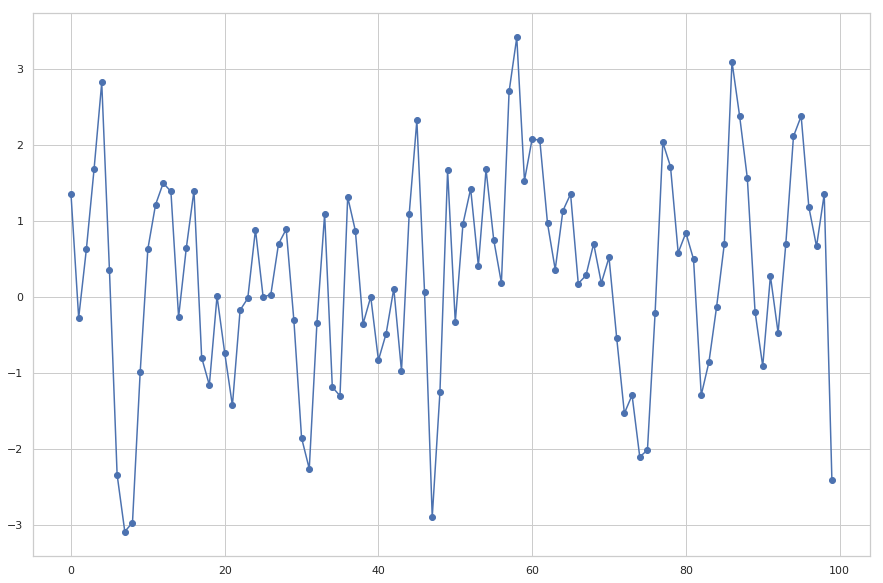

In [4]:
theta = 0.9
ar = [1]
ma = [1, theta]
p1 = sm.tsa.ArmaProcess(ar, ma)

plt.figure(figsize=(15,10))
y1 = p1.generate_sample(100, burnin=10)
plt.plot(y1, 'o-')
plt.show()

MA(1) ACF

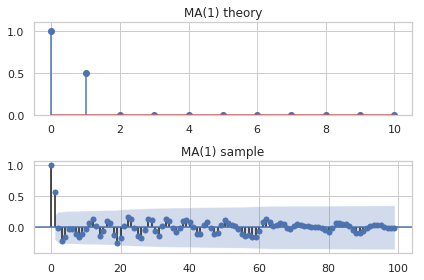

In [198]:
plt.subplot(211)
plt.stem(p1.acf(lags=11))
plt.title("MA(1) theory")
plt.ylim(0, 1.1)

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, lags=99, ax=ax)
plt.title("MA(1) sample")
plt.tight_layout()
plt.show()

MA(2)

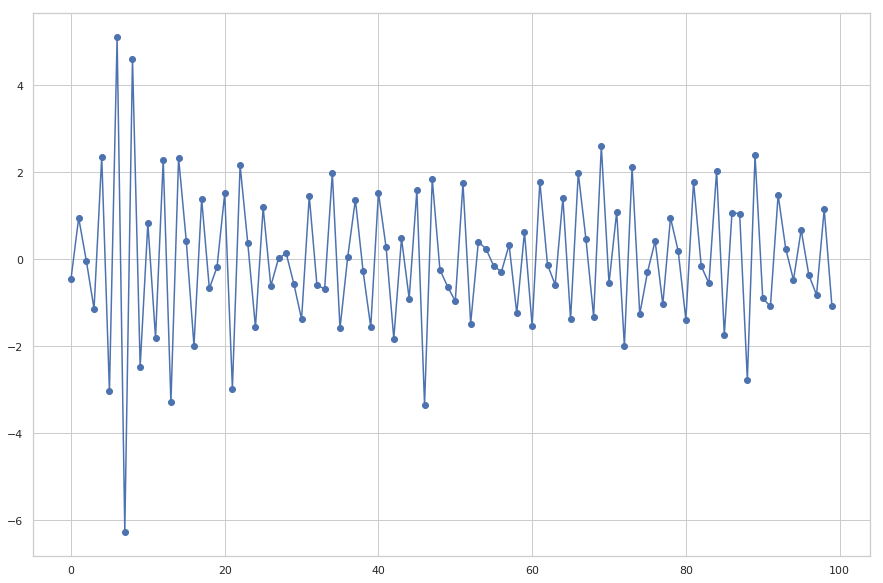

In [49]:
ar = [1]
ma = [1, -1, 0.6]
p2 = sm.tsa.ArmaProcess(ar, ma)

plt.figure(figsize=(15,10))
y2 = p2.generate_sample(100, burnin=10)
plt.plot(y2, 'o-')
plt.show()

MA(2) ACF

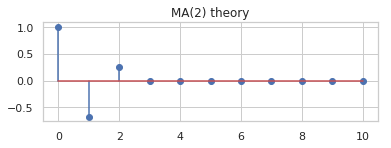

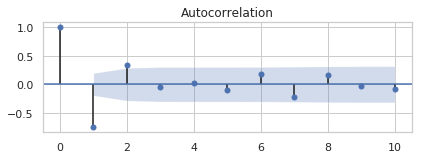

In [58]:
plt.subplot(211)
plt.stem(p2.acf(lags=11))
plt.title("MA(2) theory")
plt.show()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y2, lags=10, ax=ax)
plt.tight_layout()
plt.show()

MA(4)

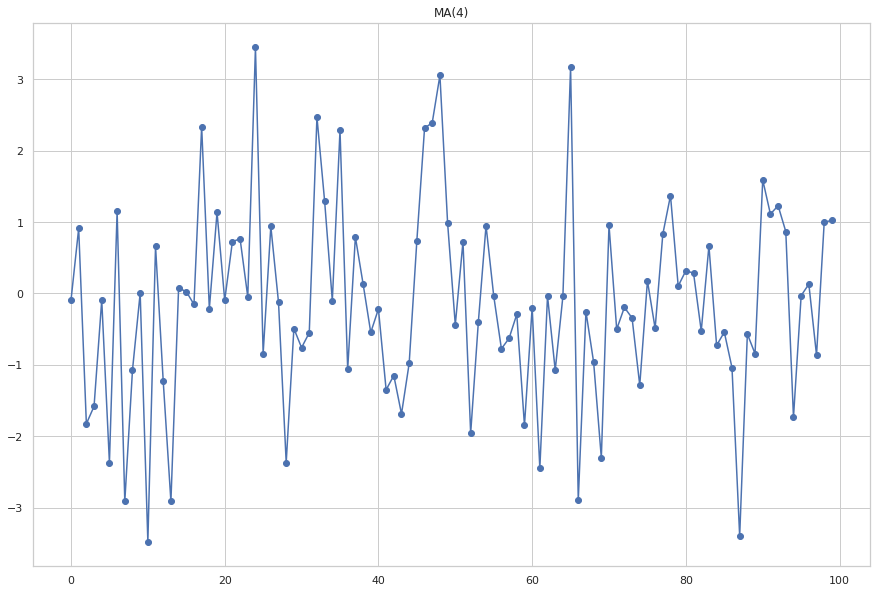

In [36]:
p4 = sm.tsa.ArmaProcess([1], [1, 0.3, 0.4, 0.5, -0.6])

plt.figure(figsize=(15,10))
y4 = p4.generate_sample(100, burnin=10)
plt.plot(y4, 'o-')
plt.title('MA(4)')
plt.show()

MA(4) ACF

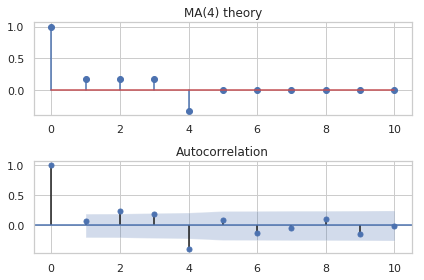

In [57]:
plt.subplot(211)
plt.stem(p4.acf(11))
plt.title("MA(4) theory")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y4, lags=10, ax=ax)
plt.tight_layout()
plt.show()

# 2. p차 AR모형
## - ARMA와 구분불가
$$Y_t = -\phi_1 Y_{t-1} -\phi_2 Y_{t-2} - \cdots -\phi_p Y_{t-p} + \epsilon_t$$
- 자기상관계수 오랫동안 0이 아님
- 자기상관계수가 없다가 다시 생김
- AR(1): 주기1 vs AR(2): 주기 조절가능

AR(1)

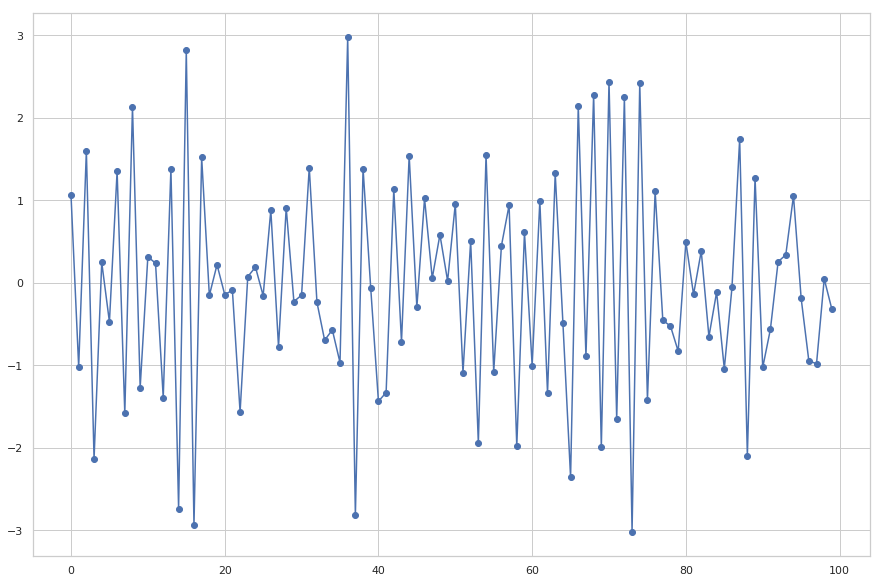

In [179]:
plt.figure(figsize=(15, 10))
p1 = sm.tsa.ArmaProcess([1, 0.7], [1])
y1 = p1.generate_sample(100, burnin=10)
plt.plot(y1, 'o-')
plt.show()


AR(1) ACF

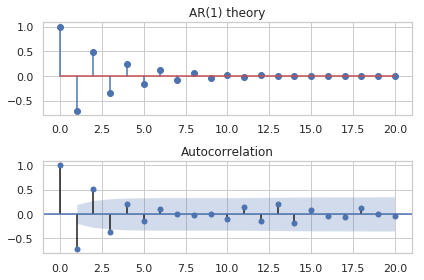

In [180]:
plt.subplot(211)
plt.stem(p1.acf(21))
plt.title("AR(1) theory")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, lags=20, ax=ax)
plt.tight_layout()
plt.show()


AR(2)

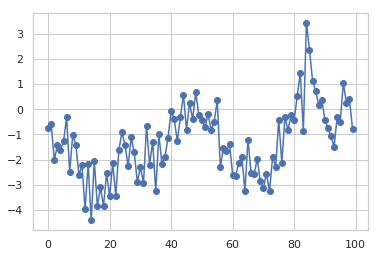

In [156]:
p2 = sm.tsa.ArmaProcess([1, -0.4, -0.5], [1])
y2 = p2.generate_sample(100)
plt.plot(y2, 'o-')
plt.show()

AR(2) ACF: 여러가지 version

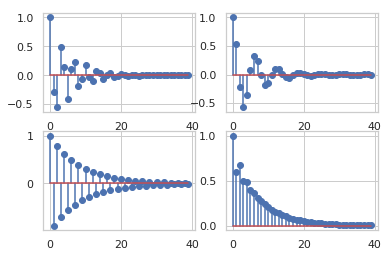

In [165]:
plt.subplot(221)
p1 = sm.tsa.ArmaProcess([1, 0.5, 0.7], [1])
plt.stem(p1.acf(40))

plt.subplot(222)
p2 = sm.tsa.ArmaProcess([1, -0.9, 0.7], [1])
plt.stem(p2.acf(40))

plt.subplot(223)
p3 = sm.tsa.ArmaProcess([1, 0.5, -0.7], [1])
plt.stem(p3.acf(40))

plt.subplot(224)
p4 = sm.tsa.ArmaProcess([1, -0.3, -0.5], [1])
plt.stem(p4.acf(40))

plt.show()

# 3. ARMA 모형
## - AR과 구분 불가
$$1) 
y_t = -\phi_1 Y_{t-1} -\phi_2 Y_{t-2} - \cdots - \phi_p y_{t-p} + \\ \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q + \epsilon_{t-q} 
$$


$$2)y_{t}=\phi_{1}y_{t-1}+\ldots+\phi_{p}y_{t-p}+\theta_{1}\epsilon_{t-1}
           +\ldots+\theta_{q}\epsilon_{t-q}+\epsilon_{t}$$
   
   
   
$$3) \left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
        \left(1-\theta_{1}L-\ldots-\theta_{q}L^{q}\right)$$


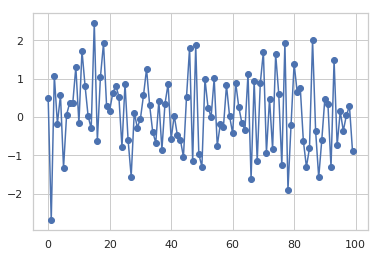

In [167]:
phi1 = 0.7
theta1 = -0.4
p1 = sm.tsa.ArmaProcess([1, phi1], [1, -theta1])
y1 = p1.generate_sample(100)
plt.plot(y1, 'o-')
plt.show()

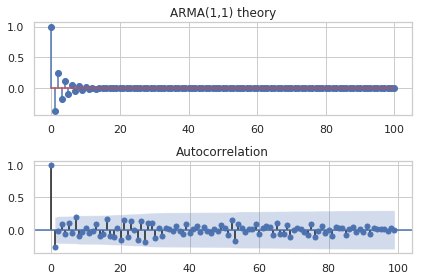

In [170]:
plt.subplot(211)
plt.stem(p1.acf(101))
plt.title("ARMA(1,1) theory")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, lags=99, ax=ax)
plt.tight_layout()
plt.show()

# 4. ARIMA 모형
$$
\nabla^d Y_t = Y_t -Y_{t-1} \rightarrow ARMA
$$
- 자기상관계수가 빠르게 감소하지 않음

IMA(1,1): $\nabla Y_t =  Y_t - Y_{t-1} = \epsilon_t + \theta_1 \epsilon_{t-1}$

IMA(2,1): $\nabla^2 Y_t = \nabla Y_t - \nabla Y_{t-1} = \epsilon_t + \theta_1 \epsilon_{t-1}$

### Plot

In [25]:
# IMA(1,1) vs ARMA(1,1) 비교용도

<Figure size 720x144 with 0 Axes>

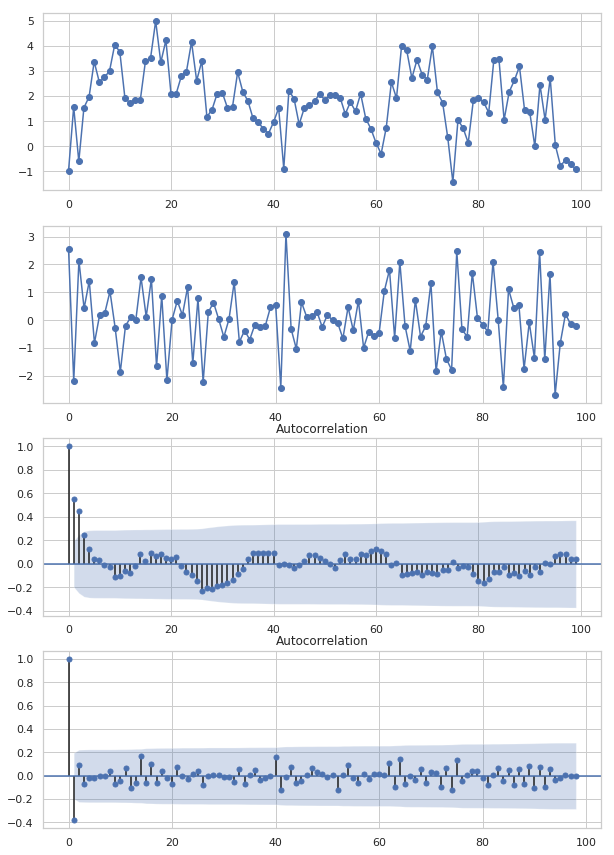

In [47]:
plt.figure(figsize=(10, 2))
p2 = sm.tsa.ArmaProcess([1, -1], [1, -0.5])
sample = p2.generate_sample(100)

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(sample, 'o-')

plt.subplot(412)
plt.plot(np.diff(sample), 'o-')

ax1 = plt.subplot(413)
sm.graphics.tsa.plot_acf(sample, ax=ax1)

ax2 = plt.subplot(414)
sm.graphics.tsa.plot_acf(np.diff(sample), ax=ax2)
plt.show()

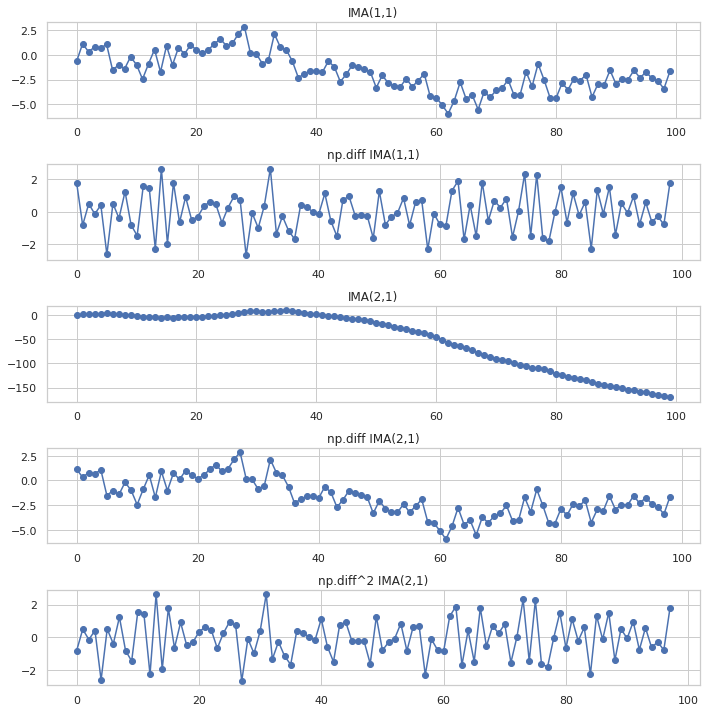

In [43]:
p1 = sm.tsa.ArmaProcess([1], [1, -0.5])
sample = p1.generate_sample(100)
y1 = sample.cumsum()
y2 = sample.cumsum().cumsum()
# y2 = p1.generate_sample(100).cumsum().cumsum()

plt.figure(figsize=(10,10))

plt.subplot(511)
plt.plot(y1, 'o-')
plt.title("IMA(1,1)")

plt.subplot(512)
plt.plot(np.diff(y1), 'o-')
plt.title("np.diff IMA(1,1)")

plt.subplot(513)
plt.plot(y2, 'o-')
plt.title("IMA(2,1)")

plt.subplot(514)
plt.plot(np.diff(y2), 'o-')
plt.title("np.diff IMA(2,1)")

plt.subplot(515)
plt.plot(np.diff(np.diff(y2)), 'o-')
plt.title("np.diff^2 IMA(2,1)")

plt.tight_layout()
plt.show()

### ACF

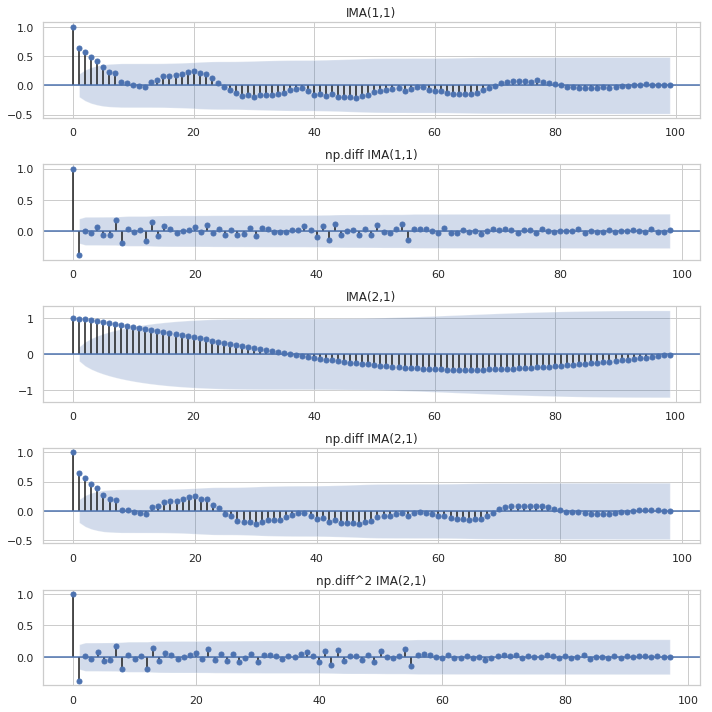

In [175]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(511)
sm.graphics.tsa.plot_acf(y1, ax=ax1)
ax1.set_title("IMA(1,1)")

ax2 = plt.subplot(512)
sm.graphics.tsa.plot_acf(np.diff(y1), ax=ax2)
ax2.set_title("np.diff IMA(1,1)")

ax3 = plt.subplot(513)
sm.graphics.tsa.plot_acf(y2, ax=ax3)
ax3.set_title("IMA(2,1)")

ax4 = plt.subplot(514)
sm.graphics.tsa.plot_acf(np.diff(y2), ax=ax4)
ax4.set_title("np.diff IMA(2,1)")

ax5 = plt.subplot(515)
sm.graphics.tsa.plot_acf(np.diff(np.diff(y2)), ax=ax5)
ax5.set_title("np.diff^2 IMA(2,1)")

plt.tight_layout()
plt.show()

# 4.1 과차분
## - 큰 시차에 대한 ACF 남아있음
MA(1) -> MA(3)

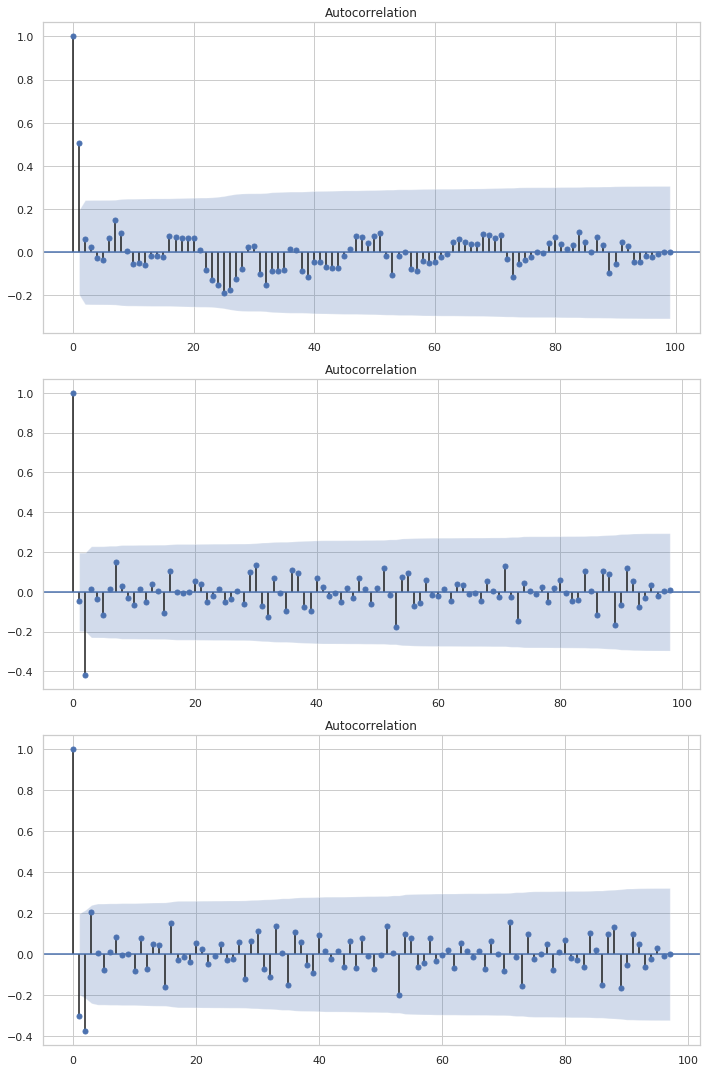

In [200]:
#p: 정상과정 MA(1)
#y2: 정상과정의 표본
#y1: 과차분
#y0: 과차분^2
p = sm.tsa.ArmaProcess([1], [1, 0.6])
y2 = p.generate_sample(100, burnin=10)
y1 = np.diff(y2)
y0 = np.diff(y1)

plt.figure(figsize=(10,15))

ax = plt.subplot(311)
ax1 = plt.subplot(312)
ax2 = plt.subplot(313)

sm.graphics.tsa.plot_acf(y2, ax=ax)
sm.graphics.tsa.plot_acf(y1, ax=ax1)
sm.graphics.tsa.plot_acf(y0, ax=ax2)

plt.tight_layout()
plt.show()

# 4.2 ADF 검정
- `statsmodels.tsa.adfuller`

In [212]:
#y0: ARIMA(0,2,1)
#y1: ARIMA(0,1,1)
#y2: ARIMA(0,0,1)
p = sm.tsa.ArmaProcess([1], [1, 0.6])
sample = p.generate_sample(100)
y0 = sample.cumsum().cumsum()
y1 = np.diff(y0)
y2 = np.diff(y1)

In [298]:
def adf(*arg):
    df = pd.DataFrame(columns=['adf', 'pvalue', 'used lag', 'nobs', 'critical values', 'AIC'])
    for i, data in enumerate(arg):
        l = list(sm.tsa.adfuller(data))
        df.loc[i] = l
    return df
adf(y0, y1, y2)        

,adf,pvalue,used lag,nobs,critical values,AIC
0,0.595162,0.987496,6,93,"{'1%': -3.502704609582561, '5%': -2.8931578098...",262.839626
1,-1.171284,0.685825,5,93,"{'1%': -3.502704609582561, '5%': -2.8931578098...",254.953218
2,-4.667138,0.000097,3,94,"{'1%': -3.5019123847798657, '5%': -2.892815255...",252.093027


# 5. Seasonal ARIMA 모형
## 5.1 Simple Seasonal ARIMA
- 5.1.2 simple Seasonal MA
$$
Y_t = \epsilon_t + \Theta \epsilon_{t-12}
$$
- 5.1.1 Simple Seasonal AR
$$
Y_t = -\Phi_{t-12}+\epsilon_t
$$

## 5.2 Multiplicated Seasonal ARIMA 모형

## 5.1.2 Seasonal AR(1)

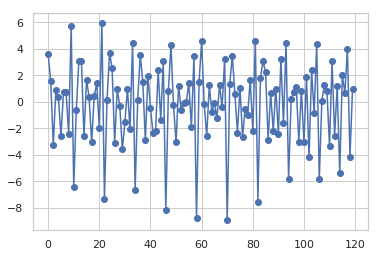

In [7]:
p1 = sm.tsa.ArmaProcess([1,0,0,0,0,0,0,0,0,0,0,0, -0.95], [1])
y1 = p1.generate_sample(120, burnin=240)
plt.plot(y1, "o-")
plt.show()

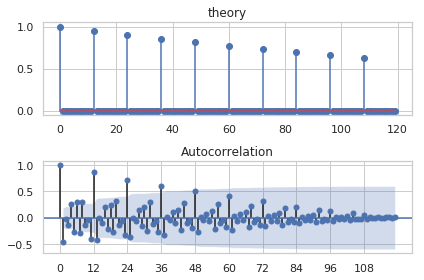

In [16]:
plt.subplot(211)
plt.stem(p1.acf(120))
plt.title('theory')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, ax=ax)
plt.xticks(range(0, 120, 12))
plt.tight_layout()
plt.show()

# 5.1.3 Seasonal IMA(1,1)
$$Y_t - Y_{t-12} = \epsilon_t + 0.1 \epsilon_{t-12}$$

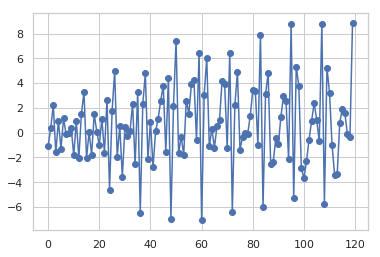

In [48]:
p2 = sm.tsa.ArmaProcess([1,0,0,0,0,0,0,0,0,0,0,0,-1], [1,0,0,0,0,0,0,0,0,0,0,0,0.05])
sample = p2.generate_sample(120)
plt.plot(sample, 'o-')
plt.show()

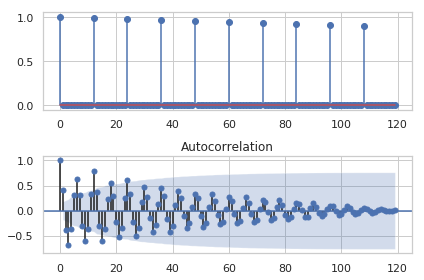

In [31]:
plt.subplot(211)
plt.stem(p2.acf(120))

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(sample, ax=ax)
plt.tight_layout()
plt.show()

# 5.2.1 Multiplicated 
1) SARIMA(0,0,1)X(0,0,1,12)
- 계절요소간 MA(1) / 개별간 MA(1)
$$
Y_t = (1-\theta L)(1- \Theta L^{12})\epsilon_t 
= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta \Theta \epsilon_{t-13}
$$

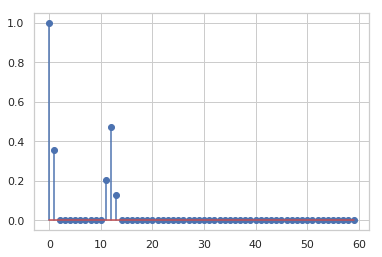

In [50]:
theta = 0.5
Theta = 0.8
p = sm.tsa.ArmaProcess([1], [1, theta, 0,0,0,0,0,0,0,0,0,0, Theta, theta * theta])
plt.stem(p.acf(60))
plt.show()

2) SARIMA(0,0,1)X(1,0,0,12)
- 계절성 요소간 AR(1) / 개별 요소간 MA(1)

$$
Y_t = -\Phi Y_{t-12} + \epsilon_t + \theta \epsilon_{t-1}
$$
$$
(1+\Phi L^{12}) Y_t = \epsilon_t + \theta \epsilon_{t-1}
$$

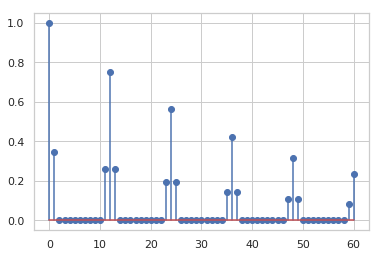

In [53]:
Phi = -0.75
Theta = 0.4
p = sm.tsa.ArmaProcess([1, 0,0,0,0,0,0,0,0,0,0,0, Phi], [1, Theta])
plt.stem(p.acf(61))
plt.show()

3) SARIMA(0,1,0)X(0,1,0,12)
- 계절성 성분간 1차 적분 / 일반 성분간 1차 적분
$$
(Y_t - Y_{t-1}) - (Y_{t-12} - Y_{t-13}) = \epsilon_t
$$
$$
Y_t = Y_{t-1} + Y_{t-12} - Y_{t-13} + \epsilon_t
$$

In [3]:
p = sm.tsa.ArmaProcess([1,-1,0,0,0,0,0,0,0,0,0,-1,1],[1])
plt.stem(p.acf(12))
plt.show()

MemoryError: 

4) SARIMA(0,1,1)X(0,1,1,12)
- 계절성 성분간 IMA(1,1) / 개별성분간 IMA(1,1)

$$
\nabla_s \nabla Y_t = \nabla_s(Y_t - Y_{t-1})
=(Y_t - Y_{t-1}) - (Y_{t-12} - Y_{t-13}) \\
\rightarrow (1+\Theta L^{12})(1+\theta L) \epsilon_t
= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta \Theta \epsilon_{t-13}
$$

실제는 더 복잡함

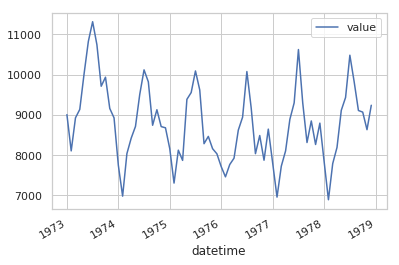

In [311]:
from datetime import timedelta, datetime
def convert_time(number):
    year = int(number)
    d = timedelta(days=(number-year)*365)
    day_one = datetime(year, 1, 1)
    date = d + day_one
    return(date)
df['datetime'] = df.time.map(convert_time)
df.plot(x='datetime', y='value')
plt.show()

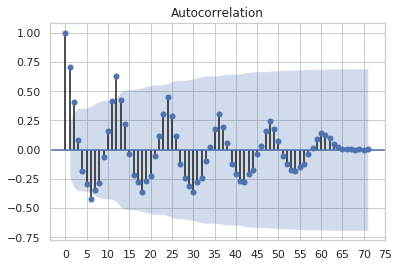

In [334]:
ax = plt.subplot()
sm.graphics.tsa.plot_acf(df['value'], ax=ax)
ax.set_xticks(range(0,80,5))
plt.show()